# Homework 2 (HW2)

---
By the end of this homework we expect you to be able to:
1. Preprocess data and make it amenable to statistical analysis and machine learning models;
2. Train and test out-of-the-box machine learning models in Python;
3. Carry out statistical hypothesis testing;
4. Carry out simple multivariate regression analyses;
5. Use techniques to control for covariates;

---

## Important Dates

- Homework release: Fri 12 Nov 2021
- **Homework due**: Fri 26 Nov 2021, 23:59
- Grade release: Fri 03 Dec 2021

---

##  Some rules

1. You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library, 
you may do so, but must justify your choice.
2. Make sure you use the `data` folder provided in the repository in read-only mode. (Or alternatively, be sure you 
don’t change any of the files.)
3. Be sure to provide a textual description of your thought process, the assumptions you made, the solution you 
implemented, and explanations for your answers. A notebook that only has code cells will not suffice.
4. For questions containing the **/Discuss:/** prefix, answer not with code, but with a textual explanation
 (**in markdown**).
5. Back up any hypotheses and claims with data, since this is an important aspect of the course.
6. Please write all your comments in English, and use meaningful variable names in your code. Your repo should have a 
single notebook (plus the required data files) in the *master/main* branch. If there are multiple notebooks present, 
we will **not grade** anything.
7. We will **not run your notebook for you**! Rather, we will grade it as is, which means that only the results 
contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. 
Thus, be sure to hand in a **fully-run and evaluated notebook**. In order to check whether everything looks as intended, you can check the rendered notebook on the GitHub website once you have pushed your solution there.
8. In continuation to the previous point, interactive plots, such as those generated using `plotly`, should be **strictly avoided**!
9. Make sure to print results or dataframes that confirm you have properly addressed the task.

---

## Context

Congratulations! You have just been hired as a data scientist at *Piccardi Music,* a promising new music label created by a mysterious Italian disc jockey "*Signor Piccardi*". The company hired you to carry out a variety of data-related tasks, which will be explained in further detail below.

---

## The data

For this homework you will use a dataset of 18,403 music reviews scraped from Pitchfork¹, including relevant metadata such as review author, review date, record release year, review score, and genre, along with the respective album's audio features pulled from Spotify's API. The data consists of the following columns:

| Column   | Description  |
|----------|:-------------|
| `artist`           | The name of the artist who created the album being reviewed. |
| `album`            | The name of the album being reviewed. |
| `recordlabel`      | The name of the record label(s) who published the album. |
| `releaseyear`      | The year that the album was released. |
| `score`            | The score given to the album by the reviewer on a scale of 0.0 to 10.0. |
| `reviewauthor`     | The name of the author who reviewed the album. |
| `genre`            | The genre assigned to the album by Pitchfork. |
| `reviewdate`       | The date that the review was published.  |
| `key` | The estimated overall musical key of the track. Integers map to pitches using standard Pitch Class notation (e.g., 0 = C, 2 = D, and so on) |
| `acousticness` | A confidence measure from 0.0 to 1.0 of whether an album is acoustic. 1.0 represents high confidencethat the album is acoustic. |
| `danceability` | How suitable an album is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 1.0 is most danceable.
| `energy` | A perceptual measure of intensity and activity, from 0.0 to 1.0, where 1.0 represents high energy. Metal is often high energy. |
| `instrumentalness` | Predicts whether an album contains no vocals, from 0.0 to 1.0. The closer to 1.0, the more likely the album contains no vocals. |
| `liveness` | Detects the presence of an audience, from 0.0 to 1.0. Scores greater than 0.8 indicate a strong likelihood the album is live. |
| `loudness` | The overall loudness of the album in decibels (dB). |
| `speechiness` | Measures the presence of spoken words in an album on a scale from 0.0 to 1.0. Scores higher than 0.66 indicate an album made entirely of spoken words, while scores below 0.33 indicate music and other non-speech-like elements. |
| `valence` | A measure from 0.0 to 1.0 describing the musical positiveness conveyed by an album, where values closer to 1.0 indicate more positive sounds. |
| `tempo` | The overall estimated tempo of an album in beats per minute (BPM). |

¹Pinter, Anthony T., et al. "P4KxSpotify: A Dataset of Pitchfork Music Reviews and Spotify Musical Features." Proceedings of the International AAAI Conference on Web and Social Media. Vol. 14. 2020.

In [1]:
# CHANGE THIS IF YOU NEED/WANT TOO

# pandas / numpy
import pandas as pd
import numpy as np

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# datetime operations
from datetime import datetime

# ttest and euclidean distance
from scipy.stats import ttest_ind
from scipy.spatial.distance import seuclidean

# linear fit using statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

# good ole sklearn
from sklearn.metrics import euclidean_distances, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

# displaying markdown strings
from IPython.display import display, Markdown, Latex

## Part 1: Will this album be a hit?

The first project you embark on in your new job is to build a regressor to predict whether an album will be well received or not. According to *Signor Piccardi* (your boss), this algorithm may eventually be helpful in forecasting the success of albums produced by *Piccardi Music*.

**Task 1 (Initial analyses — 10 pts)**

As a good data scientist, the first thing you do is to have a good look at the data that was handed to you.

1. Load the data using `pandas`. Identify and remove duplicate reviews, i.e., two reviews with albums by the same band with the same name (keep the first occurrence). Print the number of rows in your dataframe.

2. Plot the distribution of album release years and the average score of albums per year.

3. For numerical columns, calculate the mean, median, minimum value and maximum value. Additionally, plot the distribution for all the numerical columns in a single image (possibly with multiple subplots). Your image should be at most 14 inches wide by 14 inches long.

3. For categorical columns, list how many different values there are in each column. If there are less than 10 distinct values for a category, print them all. For the `genre` column, assign the value `'Other'` for albums where the value is either `'none'` or `NaN`.

5. **Discuss:** This dataset was built with *found data*—i.e., the Pitchfork reviews were not made with the goal of training a machine learning model. Grounded on the previous analyses and in Pitchfork's [Wikipedia page](https://en.wikipedia.org/wiki/Pitchfork_(website)), point **three** (exactly!) ways in which this data may not be representative of music albums in general due to the way the data was collected. 

---

**Task 1**

**Task 1 Question 1:** load the data and remove duplicated columns

In [2]:
df = pd.read_csv("./data/pitchfork.csv.gz") # Load the data using `pandas`
df_drop_duplicates = df.drop_duplicates(subset=['artist', 'album'], keep='first') # remove duplicate reviews
print(f'number of rows: {len(df_drop_duplicates.index)}') # print number of rows
df_drop_duplicates.sample(4)

number of rows: 16738


,artist,album,reviewauthor,score,releaseyear,reviewdate,recordlabel,genre,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
6744,Joe Lally,There to Here,Jason Crock,6.4,2006.0,January 18 2007,Dischord,Metal,0.408692,0.483923,5.769231,-7.549077,0.039892,0.870615,0.839385,0.134700,0.332923,128.633538
13801,Prince,Dirty Mind,Barry Walters,10.0,1980.0,April 29 2016,Warner Bros.,Pop/R&B,0.803250,0.405000,5.250000,-13.610375,0.122963,0.042924,0.356039,0.118400,0.699013,121.294750
13237,Prince Rama,Top 10 Hits of the End of the World,Zach Kelly,6.8,2012.0,November 9 2012,Paw Tracks,Electronic,0.445800,0.762100,4.300000,-7.477300,0.045400,0.103392,0.316400,0.426140,0.360580,118.981200
9494,A Northern Chorus,Bitter Hands Resign,Brian Howe,6.0,2005.0,June 5 2005,Sonic Unyon,Rock,0.338625,0.390000,6.125000,-9.248875,0.032375,0.215873,0.337888,0.131763,0.117375,110.233625


**Task1 Question2:** visualize distribution of release year and average score

Text(0.5, 1.0, 'The distribution of albulm release year')

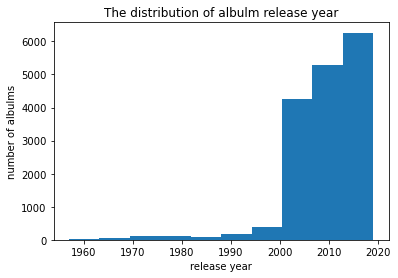

In [3]:
df_drop_duplicates['releaseyear'].plot.hist() # distribution of album release years
plt.xlabel('release year')
plt.ylabel('number of albulms')
plt.title('The distribution of albulm release year')

Text(0.5, 1.0, 'Average score of albulms per year')

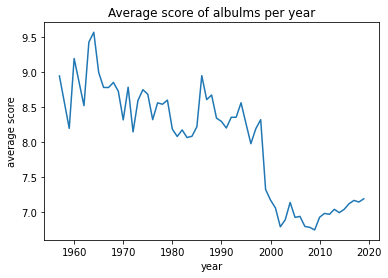

In [4]:
df_drop_duplicates.groupby('releaseyear')['score'].mean().plot(xlabel='year', ylabel='average score') # average score of albums per year
plt.title('Average score of albulms per year')

**Task 1 Question 3**: statistics of numerical columns.

In [5]:
df_numerical = df_drop_duplicates.select_dtypes(include=['float64']) # find the numerical columns
numerical_columns_name = df_numerical.columns 
df_numerical_stats = pd.concat([df_numerical.mean(axis=0).rename('mean'), df_numerical.median(axis=0).rename('median'), df_numerical.min(axis=0).rename('min'), df_numerical.max(axis=0).rename('max')], axis=1)
df_numerical_stats # demonstrate the table of statistics of numerical features

,mean,median,min,max
score,7.048596,7.300000,0.00000,10.000
releaseyear,2009.346338,2010.000000,1957.00000,2019.000
danceability,0.512334,0.511348,-1.00000,0.974
energy,0.601276,0.624722,-1.00000,0.999
key,5.216501,5.230769,-1.00000,11.000
loudness,-9.283268,-8.444263,-51.72875,4.078
speechiness,0.090742,0.056665,-1.00000,0.958
acousticness,0.301914,0.228844,-1.00000,0.996
instrumentalness,0.274748,0.149363,-1.00000,0.982
liveness,0.196402,0.174261,-1.00000,0.978


distribution of numerical features:


array([[<AxesSubplot:title={'center':'score'}>,
        <AxesSubplot:title={'center':'releaseyear'}>,
        <AxesSubplot:title={'center':'danceability'}>],
       [<AxesSubplot:title={'center':'energy'}>,
        <AxesSubplot:title={'center':'key'}>,
        <AxesSubplot:title={'center':'loudness'}>],
       [<AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'instrumentalness'}>],
       [<AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'valence'}>,
        <AxesSubplot:title={'center':'tempo'}>]], dtype=object)

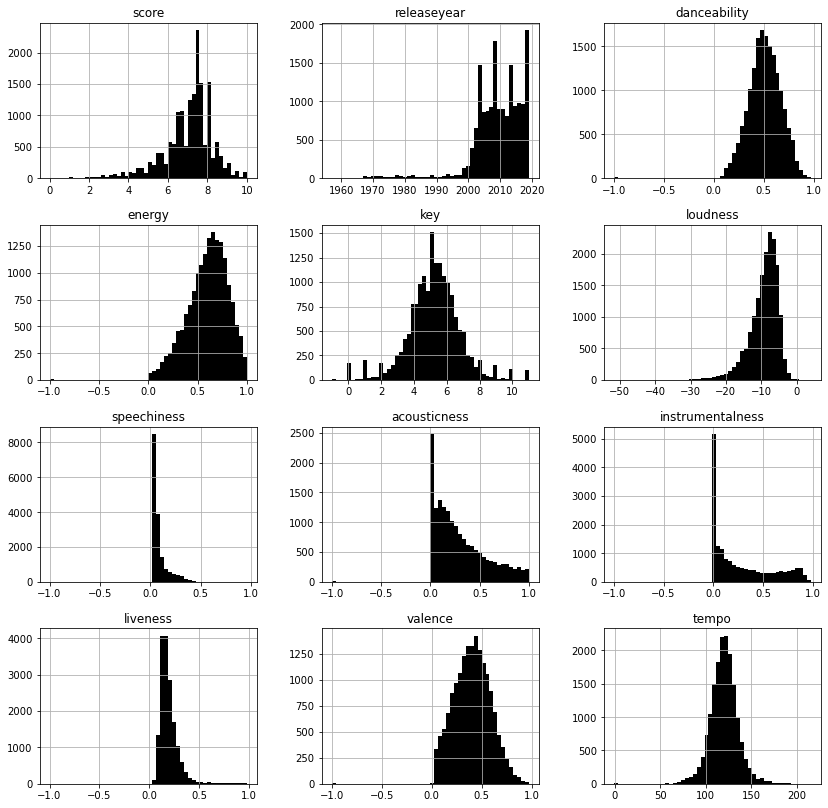

In [6]:
# Here we visualize the distributions
print('distribution of numerical features:')
df_drop_duplicates.select_dtypes(include=['float64']).hist(color="k", bins = 50, figsize=(14,14))

**Task 1 Question 4:** list numbers of values in categorical columns.

In [7]:
pd.set_option('chained_assignment',None)
df_drop_duplicates['genre'] = df_drop_duplicates['genre'].fillna('Other').replace('none', "Other") # Replace the 'none' and nan by 'others'
# note: inplace=False to suppress chained assignment
df_categorical = df_drop_duplicates.select_dtypes(include=['object']) # select categorical columns
categorical_columns_name = df_categorical.columns
for i in range(len(categorical_columns_name)): # display the number of categories in each categorical columns
    categorical_column_name = categorical_columns_name[i]
    categorical_column = df_categorical[categorical_column_name]
    unique = categorical_column.unique()
    print(f'Number of different {categorical_column_name} is {len(unique)}')
    if len(unique) <= 10: # display the categories for small set (<=10)
        print(f'The categories in {categorical_column_name} are: {unique}')


Number of different artist is 7892
Number of different album is 16183
Number of different reviewauthor is 554
Number of different reviewdate is 4876
Number of different recordlabel is 3032
Number of different genre is 10
The categories in genre are: ['Electronic' 'Folk/Country' 'Rock' 'Rap' 'Global' 'Experimental' 'Metal'
 'Pop/R&B' 'Jazz' 'Other']


**Task 1 Question 5:**
1. The Pitchfork website is famous for rock music, the genre of music contained in the website might be biased.
2. The reviewers in Pitchfork might have certain preferences in the music genres. Based on previous analysis, we find that many features of the music in the dataset have very skewed distributions. They are usually loud, energetic, and lack speech-like elements. Hence, the score of music on the website might be biased.
3. The reviews from the websites are criticized as "verbose and unreadable writing" and "overly florid", which might not reflect the true character of the album.

#### **Task 2 (Pre-processing and pipeline code — 12 pts)**

Next, you decide to prepare the code that will help you in training your machine learning models. Also, you implement a simple baseline. For this task, **unless otherwise stated** you must implement functions yourself, instead of relying on `scikit-learn` (you can use `numpy` or `pandas`, though!).

1. For each possible value in the `genre` column, create a new column called `{genre}_onehot` (e.g., for `genre=jazz`, create `jazz_onehot`). Collectively, these new columns should "one hot-encode" the genre column—for instance, if for a given album the `genre` is filled with the value `jazz`, the `jazz_onehot` column should equal 1 and all other `{genre}_onehot` columns should equal 0. 

2. Create a function `numpy_helper(df, cols)` to obtain a `numpy.array` out of your `dataframe`. The function should receive a dataframe `df` with N rows and a list of M columns `cols`, and should return a `np.array` of dimension (NxM).

3. For each album, build an array of features `X` containing all genre-related one-hot features, and an array of outcomes `y` containing scores. Using the function [`sklearn.model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with `random_state=123`, split the data into a train set containing 70% of all data, and a test set containing the remaining 30%.

4. Create your own baseline regressor. Using the training data (in the training stage), your regressor should estimate the average score for all albums. Then, for the test data (in the prediction stage), your classifier should always output the average score (computed on the training data).

5. Calculate the [coefficient of determination ($R^2$)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html) of your baseline on the test data. **You are allowed to use the `sklearn` implementation here.**

6. **Discuss:** Your train-test split randomly selected 70% of all data for the training set. Why is this a problem for the broader task of predicting whether a future album will be successful or not?

---

**Task 2 Question 1:** onehot encoding of the genres

In [8]:
one_hot = pd.get_dummies(df_drop_duplicates, columns = ['genre']) # convert genre into onehot encoding
# convert the column name into proper format
genre_list = df_drop_duplicates['genre'].unique()
onehot_dict = {('genre_' + genre_) : (genre_ + '_onehot') for genre_ in genre_list} 
one_hot = one_hot.rename(columns= onehot_dict)
one_hot.sample(5)

,artist,album,reviewauthor,score,releaseyear,reviewdate,recordlabel,danceability,energy,key,...,Electronic_onehot,Experimental_onehot,Folk/Country_onehot,Global_onehot,Jazz_onehot,Metal_onehot,Other_onehot,Pop/R&B_onehot,Rap_onehot,Rock_onehot
9572,Le1f,Hey EP,Andrew Ryce,7.6,2014.0,March 17 2014,XL,0.521000,0.287250,3.750000,...,0,0,0,0,0,0,0,0,1,0
11123,John Renbourn,The Attic Tapes,Grayson Haver Currin,6.5,2015.0,October 28 2015,Riverboat,0.369286,0.460643,3.857143,...,0,0,1,0,0,0,0,0,0,0
969,Phonophani,Oak or Rock,Mark Richardson,7.5,2005.0,April 3 2005,Rune Grammofon,0.243900,0.271100,5.100000,...,1,0,0,0,0,0,0,0,0,0
9163,Lackthereof,My Haunted,Joe Tangari,6.0,2008.0,July 23 2008,Film Guerrero,0.468462,0.223508,5.538462,...,0,0,0,0,0,0,0,0,0,1
14169,Those Peabodys,Unite Tonight,Andy Beta,4.2,2003.0,September 2 2003,Tiger Style,0.599688,0.442875,4.312500,...,0,0,0,0,0,0,0,0,0,1


**Task 2 Question 2:** create the helper function to convert dataframe into numpy array

In [9]:
# define the function to convert dataframe columns into numpy
# It takes a dataframe and column names, and returns a numpy array of features in specified columns
def numpy_helper(df, cols):
    return df[cols].to_numpy()

**Task 2 Question 3:** build features using onehot coding and split the dataset into training and test

In [10]:
# Build the features 
X = numpy_helper(one_hot, onehot_dict.values()) # features
y = numpy_helper(one_hot, 'score') # scores
X.shape # make sure features have the correct shape

(16738, 10)

In [11]:
# split train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

**Task 2 Question 4**: build the baseline regressor (here I build it like by defining a class, so that it can be called and adapted to different dataset if we need it later)

In [13]:
# Baseline regressor
class BaselineRegressor:
    '''
    Baseline regressor estimate the average of all train sets
    It returns the average value when predicting
    '''
    def __init__(self):
        self.score = None
    
    def train(self, y):
        '''
        Computes the average of scores and stores in score
        '''
        self.score = np.mean(y)
    
    def predict(self, X):
        '''
        returns the predicted score (the average stored in score)
        '''
        N = X.shape[0]
        return self.score * np.ones(N)
    
# Train the BaselineRegressor on training data, and predict on test data
baseline_reg = BaselineRegressor()
baseline_reg.train(y_train)
y_pred = baseline_reg.predict(X_test)
assert(np.all(y_pred == y_train.mean())) # check the correctness: predict the average of training data

**Task 2 Question 5:** calculate the coefficient of determination

In [14]:
# calculate the coefficient of determination
r2_base = r2_score(y_test, y_pred)
print('The coefficient of determination (R^2) of Baseline regressor is: ' + str(r2_base))

The coefficient of determination (R^2) of Baseline regressor is: -8.75891503990811e-05


**Task 2 Question 6**

This train-test split method makes prediction harder to succeed. Using this training method, the model tends to be overfitted to the 70% training set. As a result, it fails to generalize to the whole data and also fails to predict the test data. In the above calculation, the average training score has $R^2=0$ on the training set (which is expected due to the definition of $R^2$), but a slightly negative value in the test set. This happens because the prediction is the mean of the training scores, thereby ignoring other data in the test set. Cross-validation, which trains on a subset of data and validates on the other data, can be a solution to this problem.

**Task 3 (Regression — 14 pts)**

Finally, you get down to business and train your regression models.

1. Build a Linear Regression model (use `sklearn`) that predicts the outcome `score` using the features "releaseyear",  "key", "acousticness", "danceability", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "valence", "tempo" and the one-hot encoded genre-related columns.  Using a 70/30 train-test split similar to what you did in task two (hereinafter referred to as "the random split", use the same random seed, `random_state=123`), report the $R^2$ for the testing set.

2. Create an alternate train-test split (hereinafter referred to as "the longitudinal split") where you train with data from albums released before 2000 and test with data from 2003 and after. Report the $R^2$ for the testing set using the same model you developed for the previous question. **Discuss:** give the correct interpretation of $R^2$ value for the longitudinal split.

3. For a given entry $X$ your model outputs a predicted score $Y'$. The difference between the real score $Y$ and the predicted score $Y'$ is called the "residual". Considering the model trained in 3.2, plot the distribution of your residuals for the test set. Additionally, estimate what is the probability that your score prediction (from 3.2) is off by more than 2-points? Provide bootstrapped confidence intervals for your answer.

4. Experiment with training a different regressor, a Gradient Boosting Regressor. This regressor is related to the Boosted decision trees that you have seen in class. This model performs extremely well for a variety of tasks and is often used in machine learning competitions for tabular data (e.g., on Kaggle). Train the regressor using the longitudinal split and the same features as in 3.2, use the default hyperparameters. Report the $R^2$ for the testing set. 

5. **Discuss:** Hypothesize a reason for the difference in performance between the Linear regression and the Gradient Boosting Regressor.

---

**Task 3 Question 1:** Linear Regressor

In [15]:
# Get the features and split data, using the pipline in task2
feature_cols = list(onehot_dict.values()) + ["releaseyear", "key", "acousticness", "danceability", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "valence", "tempo"]
X = numpy_helper(one_hot, feature_cols)
y = numpy_helper(one_hot, 'score')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [16]:
# Build a linear regression model
linear_model = LinearRegression()
# Train the model and compute the coefficient of determination
linear_model.fit(X_train, y_train)
r2_linear = linear_model.score(X_test, y_test)
print('The coefficient of determination (R^2) of linear regressor is: ' + str(r2_linear))

The coefficient of determination (R^2) of linear regressor is: 0.04419659171609491


**Task 3 Question 2:** longitudinal data split

In [17]:
# Get the new train data and test data
before_2000 = one_hot[one_hot['releaseyear'] < 2000]
after_2003 = one_hot[one_hot['releaseyear'] >= 2003]
X_train_longl = numpy_helper(before_2000, feature_cols)
y_train_longl = numpy_helper(before_2000, 'score')
X_test_longl = numpy_helper(after_2003, feature_cols)
y_test_longl = numpy_helper(after_2003, 'score')

In [18]:
# Train the model and compute the coefficient of determination on new data split
linear_model.fit(X_train_longl, y_train_longl)
r2_linear_longl = linear_model.score(X_test_longl, y_test_longl)
print('The coefficient of determination (R^2) of linear regressor on longitudinal split is: ' + str(r2_linear_longl))

The coefficient of determination (R^2) of linear regressor on longitudinal split is: -0.2832151171710293


**[Discussion]**: A negative value means that the average square error of the model on test data is even larger than the variance of test data. Not only did the model fail to explain the variance, but it also produces more variance. This indicates that the model is overfitted to the data before 2000. In Task 1 Question 3, we can see that the score drops significantly after 2000. Using the model fitted on data before 2000 will surely fail on predicting data after 2003.

**Task 3 Question 3:** Residue distribution

Text(0.5, 1.0, 'distribution of residues for model in 3.2')

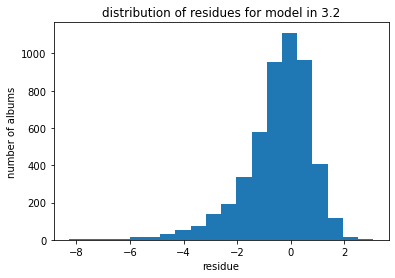

In [19]:
# Compute the residue and show distribution by histogram
residue = y_test - linear_model.predict(X_test)
plt.hist(residue, bins=20)
plt.xlabel('residue')
plt.ylabel('number of albums')
plt.title('distribution of residues for model in 3.2')

Estimate probability

In [20]:
# estimate probility of residue over 2.0 points
print('The estimated probility that predition is off by more 2-points is {}'.format(residue[np.abs(residue)>2].shape[0]/residue.shape[0]))

# calculate the confidence interval using bootstrap
from scipy.stats import bootstrap
confidence_level = 0.95
bootstrap_result = bootstrap((residue,), lambda x:x[np.abs(x)>2].shape[0]/x.shape[0], confidence_level=confidence_level, vectorized = False)
print('The confidence interval under confidence level of {} is {}'.format(confidence_level, bootstrap_result.confidence_interval))

The estimated probility that predition is off by more 2-points is 0.11150935882118677
The confidence interval under confidence level of 0.95 is ConfidenceInterval(low=0.10294703305455993, high=0.12027080844285146)


**Task 3 Question 4:** Gradient Boost Regressor

In [21]:
# Build Gradient Boosting Regressor
boost_model = GradientBoostingRegressor()
# Train the model and compute the coefficient of determination
boost_model.fit(X_train_longl, y_train_longl)
r2_boost = boost_model.score(X_test_longl, y_test_longl)
print('The coefficient of determination (R^2) of gradient boosting regressor is: ' + str(r2_boost))

The coefficient of determination (R^2) of gradient boosting regressor is: -0.3808081952565494


**Task 3 Question 5:**

The boosted tree is a more advanced model, so it is even more overfitted to the training data than the linear regressor. When it is fed with the test data, it produces even more variance, thus having a more negative coefficient of determination.

**Task 4 (Are we solving the correct problem? — 16 pts)**

All your efforts so far have assumed that decisions are taken at the "album" level, which is often not the case for bands with multiple albums. In those cases, it could be interesting to predict what is the success of a given band album given the features of the album **and of previous albums**.

1. Create a new dataframe that contains one row per band with more than 1 album. This dataframe should have the same columns as the data provided to you, considering the latest album of the respective band (note that this is determined by the release year of the album, not the date when it was reviewed). Additionally, for each feature considered in Task 3.1 (including the one-hot encoded features), create an additional column post-fixed with `_previous` (e.g., `danceability_previous`). These columns should contain the average values for all of the band's previous albums. Also, create a column `score_previous` with the average score of previous albums. Print the number of rows in the dataframe as well as the name of the columns.

2. Train a Gradient Boosting Regressor considering all features created in Task 4.1 (note that `score` is the outcome and everything else is a feature, including `score_previous`). Use the 70/30 random train-test split, the default hyperparameters, and report the $R^2$ for the testing set. 

3. Can hyperparameter tuning improve your model? Write modular code (i.e., a function) to divide your training data into $N$ folds and perform cross-validation. Experiment tuning two hyperparameters of the Gradient Boosting Regressor: `n_estimators` and `learning_rate`. For each possible combination of the two hyperparameters (see below for the range of values that you should try for each hyperparameter), train your model in a cross-validation setup with $N=20$ folds. Report the mean  $R^2$ along with the 90% CI for each scenario. 
    - n_estimators $ \in  \{ 100, 200, 300, 400\}$
    - learning_rate $ \in  \{ 0.1, 0.05, 0.01\}$.
 
 With the best hyperparameters obtained, train your model with the entire training set and report the $R^2$ on the testing set.
 
4. **Discuss:** How do these results compare with the previous setup (the scenario considered in **Task 3.4**)? Point out two reasons why it is hard to compare the results obtained in 4.3 and 3.4 at face value? How would you fairly compare the two different setups?

---

**Task 4 Question 1:** 

In [22]:
# Create a dataframe storing each band's last release 
df_band_last = one_hot.sort_values(by=['releaseyear'], ascending=False).drop_duplicates(subset=['artist'])
# Calculate the mean of previous features
ind_last_album = df_band_last.index
df_previous = one_hot.drop(ind_last_album).groupby('artist')[feature_cols + ['score']].mean()

In [23]:
# Merge the above two dataframe and create the required dataframe
df_band = result = pd.merge(df_band_last, df_previous, on='artist', suffixes=(None, '_previous')) # we use inner join to filter out bands with only one album
print('The number of rows is :' + str(len(df_band.index)))
print('The column names are:\n {}'.format(list(df_band.columns)))

The number of rows is :3564
The column names are:
 ['artist', 'album', 'reviewauthor', 'score', 'releaseyear', 'reviewdate', 'recordlabel', 'danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'Electronic_onehot', 'Experimental_onehot', 'Folk/Country_onehot', 'Global_onehot', 'Jazz_onehot', 'Metal_onehot', 'Other_onehot', 'Pop/R&B_onehot', 'Rap_onehot', 'Rock_onehot', 'Electronic_onehot_previous', 'Folk/Country_onehot_previous', 'Rock_onehot_previous', 'Rap_onehot_previous', 'Global_onehot_previous', 'Experimental_onehot_previous', 'Metal_onehot_previous', 'Pop/R&B_onehot_previous', 'Jazz_onehot_previous', 'Other_onehot_previous', 'releaseyear_previous', 'key_previous', 'acousticness_previous', 'danceability_previous', 'energy_previous', 'instrumentalness_previous', 'liveness_previous', 'loudness_previous', 'speechiness_previous', 'valence_previous', 'tempo_previous', 'score_previous']


**Task 4 Question 2**: We use the features in task 3, and the ones with _previous postfix (created in 4.1)

In [24]:
# Specify columns for features
feature_cols4 = feature_cols + list(df_previous.columns)
# Create the training and testing dataset
X = numpy_helper(df_band, feature_cols4)
y = numpy_helper(df_band, 'score')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [25]:
# Build Gradient Boosting Regressor
boost_model = GradientBoostingRegressor()
# Train the model and compute the coefficient of determination
boost_model.fit(X_train, y_train)
r2_boost = boost_model.score(X_test, y_test)
print('The coefficient of determination (R^2) is: ' + str(r2_boost))

The coefficient of determination (R^2) is: 0.9995113507056121


**Task 4 Question 3:** hyperparameter tuning

In [26]:
from sklearn.model_selection import cross_validate
# initialize the result and hyperparameters for training
k_fold = 20
n_estimators_ = [100, 200, 300, 400]
learning_rate_ = [0.1, 0.05, 0.01]
mean_R2 = np.zeros((len(n_estimators_), len(learning_rate_)))
lower_CI = np.zeros(mean_R2.shape)
upper_CI = np.zeros(mean_R2.shape)

In the following training, we consider the cross-validation process as bootstrapping the training set and obtain $R^2$ for each validation data. The 90% confidence interval is then the value of 5% and 95% after sorting the obtained list of $R^2$

In [28]:
# train the gradient boosting regressor with different hyperparameter
for i, est in enumerate(n_estimators_):
    for j, lr in enumerate(learning_rate_):
        boost_model_ = GradientBoostingRegressor(learning_rate=lr, n_estimators=est)
        r2_val = cross_validate(boost_model_, X_train, y_train, cv=k_fold)['test_score']
        r2_sort = np.sort(r2_val)
        mean_R2[i, j] = np.mean(r2_sort)
        lower_CI[i, j] = r2_sort[int(0.05 * k_fold)] # here we assume 90% confidence
        upper_CI[i, j] = r2_sort[int(0.95 * k_fold) - 1]

We visualize how the hyperparameter changes the $R^2$ value:

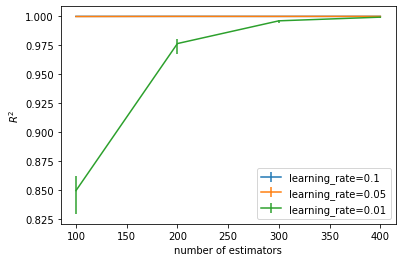

In [29]:
for i, lr in enumerate(learning_rate_):
    CI_error = [mean_R2[:, i] - lower_CI[:, i], upper_CI[:, i] - mean_R2[:, i]]
    plt.errorbar(n_estimators_, mean_R2[:, i], yerr=CI_error, label='learning_rate={}'.format(lr))
plt.xlabel('number of estimators')
plt.ylabel('$R^2$')
plt.legend()

We look more closely at the curve for learning rate = 0.1 and 0.05:

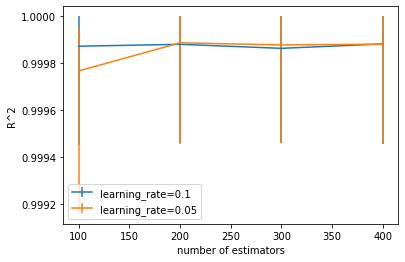

In [30]:
for i, lr in enumerate([0.1, 0.05]):
    CI_error = [mean_R2[:, i] - lower_CI[:, i], upper_CI[:, i] - mean_R2[:, i]]
    plt.errorbar(n_estimators_, mean_R2[:, i], yerr=CI_error, label='learning_rate={}'.format(lr))
plt.xlabel('number of estimators')
plt.ylabel('R^2')
plt.legend()

Since they are very close, we just choose the hyperparameter with highest mean $R^2$ value:

In [31]:
# Look at the means and find the largest
mean_R2

array([[0.99987254, 0.99976734, 0.84973963],
       [0.99988059, 0.99988702, 0.97646862],
       [0.9998635 , 0.99987804, 0.99605258],
       [0.99988234, 0.99988141, 0.99922076]])

Therefore, we use the learning rate = 0.05 and number of estimators = 300

In [32]:
# learning rate = 0.05 and number of estimators = 300
best_boost_model = GradientBoostingRegressor(learning_rate=0.05, n_estimators=300)
# Train the model and compute the coefficient of determination
best_boost_model.fit(X_train, y_train)
r2_boost = best_boost_model.score(X_test, y_test)
print('With learning rate = 0.05 and 300 estimators, the coefficient of determination (R^2) is: ' + str(r2_boost))

With learning rate = 0.05 and 300 estimators, the coefficient of determination (R^2) is: 0.9996253158019668


**Task4 Question 4**

The R^2 value is much higher than the result in **3.4**. Under this setup, R^2 is almost one, fullying explaining the variance in test data.

However, it is unfair to directly compare the two setups simply by face values, for the following reasons:
1. In **4.3**, hyperparameter tuning is performed to find the best hyperparameter, while **3.4** uses the default hyperparameter.
2. In **4.3**, cross-validation is used to reduce variance and prevent overfitting during hyperparameter tuning, thus finding the hyperparameter less overfitted. In contrast, **3.4** directly trains the model on the whole training set.

A straightforward way is to repeat the hyperparameter tuning and cross-validation process in **3.4**. Then, we may compare the difference between the two setups.


## Part 2: Second Album Syndrome

Your second project at *Piccardi Music* is to shed light on one of the business's oldest enigmas: the "second album syndrome." In a nutshell, the "second album syndrome" is a theory that states that the second album of a band always sucks. ([Related read](https://tvtropes.org/pmwiki/pmwiki.php/Main/SophomoreSlump))

Assume—for the purpose of this task—that the Pitchfork data contains all albums for all artists it covers (even though this might not be true in reality).

**Task 5 (Preliminary analyses — 8 pts)**

You begin by carrying out some preliminary data processing and analyses.

1. Create a new dataframe (from the original data with duplicates dropped, the same as you obtained after finishing Task 1.1) containing only albums from artists with two or more albums and where the release year is not empty.
2. Create a new column `album_number` which indicates how many albums the artist has produced before this one (before the second album, the artist has already produced one album).
3. Calculate the mean and the standard error of the mean of the scores of the first and second albums in the dataset. Additionally, plot the two distributions. 
4. Use an appropriate method to determine if the difference in means of 1st and 2nd albums is statistically significant?
5. **Discuss:** Do these analyses suggest that the "second album syndrome" exists?

---

**Task 5 Question 1**

We first compute the number of albums by each of the artists.

In [33]:
df_artist_album_num = df_drop_duplicates['artist'].value_counts()
df_artist_album_num

Neil Young                            27
Bonnie “Prince” Billy                 22
Guided by Voices                      20
Animal Collective                     20
Gucci Mane                            19
                                      ..
Shenandoah Davis                       1
Akira Kosemura                         1
Dent May & His Magnificent Ukulele     1
Noah Georgeson                         1
D√¢m-Funk                              1
Name: artist, Length: 7892, dtype: int64

Then, we select those rows whose artist has more than one albums based on df_artist_album_num

In [34]:
df_task_5 = df_drop_duplicates[df_drop_duplicates['artist'].map(lambda x: df_artist_album_num[x]) > 1].where(lambda x: x['releaseyear'].notna())
df_task_5.sample(4)

,artist,album,reviewauthor,score,releaseyear,reviewdate,recordlabel,genre,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
15221,CocoRosie,The Adventures of Ghosthorse and Stillborn,Marc Hogan,2.3,2007.0,April 19 2007,Touch and Go,Folk/Country,0.473250,0.418358,4.166667,-12.260083,0.106233,0.678892,0.020027,0.306867,0.232733,118.363583
15164,American Analog Set,Promise of Love,William Bowers,7.9,2003.0,July 8 2003,Tiger Style,Rock,0.570000,0.550250,4.000000,-9.922750,0.045675,0.350847,0.640375,0.125713,0.391950,124.408125
13505,PJ Harvey,Rid of Me,Judy Berman,10.0,1993.0,September 16 2018,Island Records,Rock,0.454643,0.440036,6.357143,-17.020571,0.050500,0.066691,0.165353,0.216093,0.587143,126.762500
1408,Clinic,Internal Wrangler,Matt LeMay,9.3,2000.0,May 2 2000,Domino,Electronic,0.470538,0.627615,6.384615,-10.060385,0.047077,0.253197,0.460435,0.198454,0.378385,126.702154


**Task 5 Question 2**

In [35]:
# Group w.r.t. artist, then ranking the releaseyear
df_task_5['album_number'] =  df_task_5.groupby('artist')['releaseyear'].rank(method='first') - 1 # first is necessary here.
df_task_5.sample(4)

,artist,album,reviewauthor,score,releaseyear,reviewdate,recordlabel,genre,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,album_number
4615,Brilliant Colors,Again and Again,Martin Douglas,6.8,2011.0,July 12 2011,Slumberland,Experimental,0.826000,0.681000,4.000000,-5.837000,0.046300,0.573000,0.135000,0.098900,0.339000,100.007000,1.0
9925,The Blow,Paper Television,Zach Baron,8.3,2006.0,October 26 2006,K,Pop/R&B,0.777000,0.600400,4.500000,-7.593200,0.090890,0.179676,0.041917,0.145290,0.603300,135.935500,3.0
12442,The Flaming Lips,Oczy Mlody,Stuart Berman,6.2,2017.0,January 18 2017,Warner Bros.,Rock,0.489583,0.543167,5.166667,-11.171917,0.044250,0.316367,0.549267,0.165258,0.169217,125.786417,11.0
3146,Moby,"Everything Was Beautiful, and Nothing Hurt",Sasha Geffen,5.7,2018.0,March 10 2018,Little Idiot,Electronic,0.489250,0.684750,4.250000,-8.463000,0.063658,0.480092,0.636206,0.103650,0.307417,125.658333,5.0


**Task 5 Question 3**

first_album_score: mean - 7.298905723905722, std - 1.2376071872400674
second_album_score: mean - 7.043294051627362, std - 1.2712995562963951


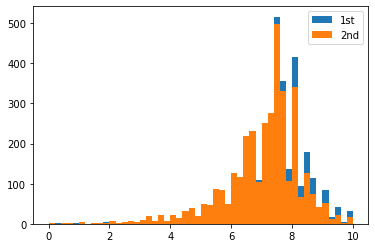

In [36]:
# Get the score of first two albulms
first_album_score = df_task_5[df_task_5['album_number']==0]['score']
second_album_score = df_task_5[df_task_5['album_number']==1]['score']
print(f'first_album_score: mean - {first_album_score.mean()}, std - {first_album_score.std()}')
print(f'second_album_score: mean - {second_album_score.mean()}, std - {second_album_score.std()}')
# Visualize the distribution
plt.hist(first_album_score, bins=50, label='1st')
plt.hist(second_album_score, bins=50, label='2nd')
plt.legend()
plt.show()

**Task 5 Question 4**

In [38]:
# Perform t test, null hypothesis: no difference between two scores
ttest_ind(first_album_score, second_album_score)

Ttest_indResult(statistic=8.60083965713685, pvalue=9.625004156621532e-18)

**Task 5 Question 5**

Yes. The score of the second album is statistically different (lower) than the first one, with $p\ll 0.01$.

**Task 6 (Regression analysis — 20 pts)**

Next, you proceed to examine some hypotheses about the "second album syndrome" using a regression framework. Namely:

- The **time spent hypothesis:**  the first album usually has a couple of years of development under its belt and plenty of trial and error from live concerts to help the band determine what does or doesn't work. The second album, on the other hand, is often made in a rush.

- The **style change hypothesis:** bands often try to change their style after their first album. This change is not always welcomed by the listeners.

1. Create a new dataframe containing one row per 1st-2nd album pair. The dataframe should contain rows:
    - `score_diff`: the difference in scores between the second and the first album (second - first).
    - `time_diff`: the number of days elapsed between the first and the second album.
    - `did_style_change`: a dummy variable that indicates whether the style of the music has changed. To obtain it, first, calculate the [standardized euclidean distance](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.seuclidean.html) of music-related numerical features¹ between the second and the first album. Second, assign 1 to the 20% most distant 1st-2nd album pairs and 0 to all others.
2. Fit a linear regression using `statsmodels` with this dataframe. Your regression should consider only an intercept, i.e., `"score_diff ~ 1"`.
3. **Discuss:** Interpret the $R^2$ in your regression here. Does this analysis confirm what you observed in Task 5? Why?
4. Include the `time_diff` and `did_style_change` as covariates in your model. Fit the regression again and report the summary of your model. 
5. **Discuss:** Interpret the coefficients `time_diff` and `did_style_change`. Carefully explain whether they provide evidence towards each of the aforementioned hypotheses? Do they rule out other reasons that may cause the "second album syndrome effect"?
6. Create a new column called `time_diff_standardized`. It should be a standardized version of the `time_diff` column. Repeat the regression done in 6.4 using the `time_diff_standardized` column instead of the `time_diff` column.
7. **Discuss:** Explain how the interpretation of the coefficients associated with this new column `time_diff_standardized` differ from its non-standardized version 
`time_diff`?

--- 

**¹** Music related numerical features are:  "key", "acousticness", "danceability", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "valence", and "tempo".


**Task 6 Question 1**

In [39]:
first_album = df_task_5[df_task_5['album_number']==0].sort_values(by=['artist']).reset_index() # need to reset_index otherwise line 7 will give nan
second_album = df_task_5[df_task_5['album_number']==1].sort_values(by=['artist']).reset_index() 
music_related = ["key", "acousticness", "danceability", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "valence", "tempo"]
music_related_1 = list(map(lambda x: x+'_1', music_related))
# Build the new dataframe: 
df_task_6 = pd.DataFrame()
df_task_6['artist'] = first_album['artist']
df_task_6['1st album'] = first_album['album']
df_task_6['2st album'] = second_album['album']
df_task_6['score_diff'] = second_album['score'] - first_album['score']
df_task_6['time_diff'] = second_album['releaseyear'] - first_album['releaseyear']

# Concat music features from two albulms for computing the did_style_change
all_music_related = pd.concat([first_album[music_related], first_album[music_related]], keys=music_related)
all_music_related_var = all_music_related.var()
second_album_1 = second_album.rename(columns=dict(zip(music_related, music_related_1)))
df_tmp = pd.concat([first_album, second_album_1], axis=1)

# Compute the colomn: did_style_change
df_task_6['did_style_change'] = df_tmp.apply(lambda row: seuclidean(row[music_related], row[music_related_1], all_music_related_var), axis=1)
threshold = df_task_6['did_style_change'].sort_values(ascending=False)[int(0.2 * len(df_task_6.index))]
df_task_6['did_style_change'] = (df_task_6['did_style_change'] > threshold).astype(int)

**Task 6 Question 2**

Regress score_diff with time_diff and did_style_change

In [40]:
df_task_6['intercept'] = 1 # this creates a columns for better visualization of the intercept when fitting
X = df_task_6['intercept']
Y = df_task_6['score_diff']
model = sm.OLS(Y, X).fit() # fit model
predictions = model.predict(X) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:             score_diff   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 26 Nov 2021   Prob (F-statistic):                nan
Time:                        21:02:56   Log-Likelihood:                -6207.4
No. Observations:                3564   AIC:                         1.242e+04
Df Residuals:                    3563   BIC:                         1.242e+04
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.2556      0.023    -11.049      0.0

**Task 6 Question 3**

$R^2=0.000$, which means that the intercept is the mean. Since the intercept$=-0.2556<0$ and the std$=0.023$ and the $p$ value is close to zero, it can illustrate the second album syndrome that the second album's score is lower than the first album's.

**Task 6 Question 4**

In [41]:
X = df_task_6[['intercept', "did_style_change", "time_diff"]]
Y = df_task_6['score_diff']
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:             score_diff   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     33.72
Date:                Fri, 26 Nov 2021   Prob (F-statistic):           3.11e-15
Time:                        21:03:01   Log-Likelihood:                -6174.0
No. Observations:                3564   AIC:                         1.235e+04
Df Residuals:                    3561   BIC:                         1.237e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
intercept           -0.1187      0.032  

**Task 6 Question 5**

The coefficients `time_diff` and `did_style_change` are both negative. $p$ value of intercept and time_diff is close to zero, while the $p$ value of the coefficients of `did_style_change` is larger than 0.05. Hence, we should only keep the constant and `time_diff` as covariates. The **style change hypothesis** does not hold.

Since the coefficient of `time_diff` is smaller than 0, which indicates a longer time difference will result in lower scores of the second album, contrary to the **time spent hypothesis**. Since the coefficient of `did_style_change` and "time_diff" are both close to zero, we will apply standardization to make their coefficient comparable.

So far, we can observe that the regression results can support neither the **time spent hypothesis** nor the **style change hypothesis**.

**Task 6 Question 6**

In [42]:
df_task_6["time_diff_standardized"] = (df_task_6["time_diff"] - df_task_6["time_diff"].mean())/df_task_6["time_diff"].std()
df_task_6["did_style_change_standardized"] = (df_task_6["did_style_change"] - df_task_6["did_style_change"].mean())/df_task_6["did_style_change"].std()
df_task_6["score_diff_standardized"] = (df_task_6["score_diff"] - df_task_6["score_diff"].mean())/df_task_6["score_diff"].std()

# Replace "time_diff" with "time_diff_standardized"
X = df_task_6[['intercept', "did_style_change", "time_diff_standardized"]]
Y = df_task_6['score_diff']
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:             score_diff   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     33.72
Date:                Fri, 26 Nov 2021   Prob (F-statistic):           3.11e-15
Time:                        21:03:13   Log-Likelihood:                -6174.0
No. Observations:                3564   AIC:                         1.235e+04
Df Residuals:                    3561   BIC:                         1.237e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
intercept                 -0

In [43]:
# Replace all covariates as their standardized version. In that case, we do not need intercept anymore.
X = df_task_6[["did_style_change_standardized", "time_diff_standardized"]]
Y = df_task_6['score_diff_standardized']
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
print_model = model.summary()
print(print_model)

                                   OLS Regression Results                                   
Dep. Variable:     score_diff_standardized   R-squared (uncentered):                   0.019
Model:                                 OLS   Adj. R-squared (uncentered):              0.018
Method:                      Least Squares   F-statistic:                              33.73
Date:                     Fri, 26 Nov 2021   Prob (F-statistic):                    3.08e-15
Time:                             21:03:17   Log-Likelihood:                         -5023.2
No. Observations:                     3564   AIC:                                  1.005e+04
Df Residuals:                         3562   BIC:                                  1.006e+04
Df Model:                                2                                                  
Covariance Type:                 nonrobust                                                  
                                    coef    std err          t      P>

**Task 6 Question 7**

Standardizing the time difference will make its coefficient farther from 0. The coefficient of "time_diff"'s 95% confidence interval [-0.042,-0.025], which is close to zero. After standardization, the coefficient of "time_diff_standardized"'s 95% confidence interval [-0.232,-0.142]. The negative linear relation would be more clearer. In the meantime, the coefficients of both "did_style_change" and "did_style_change_standardized" are close to zero, and their $p$ value is significantly larger than 0.05. After standardization, the coefficient of different covariates can be comparable. We can conclude that there is "time_diff" is negatively linear related to "score_diff", and there is no evidence that "did_style_change" have a positive or negative linear relation to "score_diff", which further support the conclusion of Question 5: In all, the regression result's can support neither **time spent hypothesis** nor **style change hypothesis**.

**Task 7 (Sanity checks — 6 pts)**

You decide to perform a few last sanity checks for your analysis.

1.  **Discuss:** If the Second Album Syndrome existed, i.e., something was special about the second album (as in if it was bad for a very particular reason that afflicted album number 2 more than all others), what would you expect to happen to the mean score of the third album?
2. Using the dataset you created in Task 5, calculate the mean and the standard error of the mean for the 1st, 2nd, 3rd, and 4th albums. Test whether the difference between the average score of the second and the third album is statistically significant.
3. **Discuss:** Does this suggest that the Second Album Syndrome exists?

---


**Task 7 Question 1**

After the second album, the scores should get back to the level of the first album, so we would expect the mean score of the third album to be similar to the score of the one album, or at least higher than the second album.

**Task 7 Question 2**

first_album_score: mean - 7.298905723905722, std - 1.2376071872400674
second_album_score: mean - 7.043294051627362, std - 1.2712995562963951
third_album_score: mean - 7.044820512820498, std - 1.2376071872400674
fourth_album_score: mean - 7.041765704584038, std - 1.2712995562963951


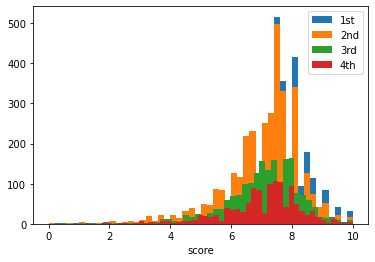

In [44]:
# Compute the thrid and forth album scores:
third_album_score = df_task_5[df_task_5['album_number']==2]['score']
fourth_album_score = df_task_5[df_task_5['album_number']==3]['score']
print(f'first_album_score: mean - {first_album_score.mean()}, std - {first_album_score.std()}')
print(f'second_album_score: mean - {second_album_score.mean()}, std - {second_album_score.std()}')
print(f'third_album_score: mean - {third_album_score.mean()}, std - {first_album_score.std()}')
print(f'fourth_album_score: mean - {fourth_album_score.mean()}, std - {second_album_score.std()}')

# Display the distributions:
plt.hist(first_album_score, bins=50, label='1st')
plt.hist(second_album_score, bins=50, label='2nd')
plt.hist(third_album_score, bins=50, label='3rd')
plt.hist(fourth_album_score, bins=50, label='4th')
plt.xlabel('score')
plt.legend()
plt.show()

In [45]:
statistic_23, pvalue_23 = ttest_ind(second_album_score, third_album_score)
statistic_24, pvalue_24 = ttest_ind(second_album_score, fourth_album_score)
statistic_34, pvalue_34 = ttest_ind(third_album_score, fourth_album_score)

print(f'2nd - 3rd: statistic: {statistic_23}, p value: {pvalue_23}')
print(f'2rd - 4th: statistic: {statistic_24}, p value: {pvalue_24}')
print(f'3rd - 4th: statistic: {statistic_34}, p value: {pvalue_34}')

2nd - 3rd: statistic: -0.043213391476414856, p value: 0.965532995457935
2rd - 4th: statistic: 0.03609663133925932, p value: 0.9712068283667014
3rd - 4th: statistic: 0.06769388226954702, p value: 0.9460336486429095


We notice that $p \gg 0.05$. Hence the distributions of the 2nd, 3rd, and 4th album are not statistically different.  

**Task 7 Question 3**

No. Although the score of the second album is statistically significantly ($p \ll 0.01$) lower than the first one, the distribution of the scores of the second, third, or fourth album is not statistically different. This indicates that the second album is not the special one, but the first album is actually the special one. It is the fact that the first album gets a higher score that gives us the impression of second album syndrome.

**Task 8 (Eureka — 14 pts)**

Your boss, *Signor Piccardi*, proposes that you carry out a simulation to make things clearer. Assuming that:


- Each band $i$ has a "talent" $\mu_i$ , which is uniformally distributed between 2 and 8, i.e., $\mu_i \sim U_{[2,8]}$.
- When a band $i$ produces an album $j$, it has quality $s_j$. This score is normally distributed with mean $\mu_i$ and standard deviation $1$, i.e., $s_j \sim N(\mu_i, 1)$
- Talents are independent and identically distributed random variables.
 
Carry out the following simulation:

- Create 1000 hypothetical bands with intrinsic talents $\mu_i \sim U_{[2,8]}$ for $i \in [1,1000]$.
- Have each hypothetical band create a hypothetical album.
- Discard all bands whose albums received a score smaller than 6.
- For each of the remaining bands, create two additional albums.

Analyzing the scores obtained in this simulation, provide a coherent explanation for the  scores obtained in Task 7.2. 

--- 

**Hint:** You can use numpy to sample random variables (e.g. [numpy.random.normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html))

In [46]:
# Generate random band talent.
# We are using np.random.uniform, where the talent is uniformly distributed in [2,8).
# Though it is a half-open interval, since the probility for exactly 8 is zero, it doesn't matter here.
sim_talent = np.random.uniform(low=2, high=8, size=1000)

# Generate the first album data
sim_first_album = np.random.normal(sim_talent, 1)

There are 323 bands has a score over 6 for their first album


Text(0.5, 1.0, 'distribution of talent')

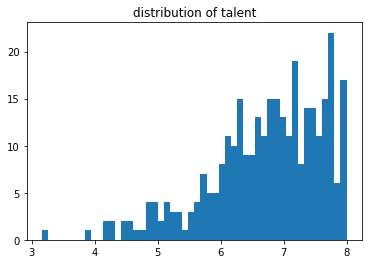

In [47]:
# Discard bands with score lower than 6
sim_filted_index = np.nonzero(sim_first_album>=6)
sim_filted_talent = sim_talent[sim_filted_index]
print('There are {} bands has a score over 6 for their first album'.format(sim_filted_talent.size))

# We will plot the distribution of survived bands' talent.
plt.hist(sim_filted_talent, bins=50)
plt.title('distribution of talent')

In [48]:
# Generate two additional albums
sim_second_album = np.random.normal(sim_filted_talent, 1)
sim_third_album = np.random.normal(sim_filted_talent, 1)

In [51]:
# According to our previous analysis, we will just consider the bands who have more than one album.
sim_first_album = sim_first_album[sim_filted_index]

In [52]:
# Firstly, we will show the mean and std for each album's score.
print('first album : mean  {}, std  {}'.format(sim_first_album.mean(), sim_first_album.std()))
print('second album: mean  {}, std  {}'.format(sim_second_album.mean(), sim_second_album.std()))
print('third album : mean  {}, std  {}'.format(sim_third_album.mean(), sim_third_album.std()))

first album : mean  7.280101824182626, std  0.8920027810005215
second album: mean  6.651163335976311, std  1.324707439384033
third album : mean  6.715436531265616, std  1.357828314935444


In [53]:
# Then, we also test the difference between average values.
statistic_12, pvalue_12 = ttest_ind(sim_first_album, sim_second_album)
statistic_13, pvalue_13 = ttest_ind(sim_first_album, sim_third_album)
statistic_23, pvalue_23 = ttest_ind(sim_second_album, sim_third_album)

print('1st and 2nd: t-statistic  {}, p-value  {}'.format(statistic_12, pvalue_12))
print('1st and 3rd: t-statistic  {}, p-value  {}'.format(statistic_13, pvalue_13))
print('2nd and 3rd: t-statistic  {}, p-value  {}'.format(statistic_23, pvalue_23))

1st and 2nd: t-statistic  7.066784487124795, p-value  4.1323269028578414e-12
1st and 3rd: t-statistic  6.236905510386485, p-value  8.081793028467138e-10
2nd and 3rd: t-statistic  -0.6079868765454005, p-value  0.5434105228219754


**Discuss:** 

We can find that there is a significant difference between the first and the second album, while no significant difference between the second and the third one. The simulation result is similar to what we find in task 7.

The result is might be caused by the biased selection of bands. In our experiment, we filter out the band whose first album perform poorly. Similarly, in the real data, it is possible that getting a higher score on the first album will encourage the band to issue the later albums, and those who failed in their first album might just give up. Meanwhile, the score of a band's album has some randomness, which is why we use a normal distribution in our simulation. So, many bands with 'low talent' survive because they luckily perform well on the first album, while some bands with 'high talent' unfortunately get filtered out. As a result, when we select the bands producing more than one album, the selection is biased toward the bands lucky on first albums. This leads to higher scores for the first albums of survived albums when the later albums show poorer performance (but no difference between them).